This is a redo of the close look at the IC after refactoring the corrected (but very, very messy) `base_state.f90` to check no errors were introduced.

Comparing to the other sheet (a html print out should be in the meeting dir somewhere) it seems like nothings changed

Will also run and check the simulation evolution.

# A closer look at the initial condition

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

In [2]:
# put the relative or absolute directory of the problem output here
#dataDir = '../oldruns/wed26/baseBefore/'
dataDir = '../single_level/'

baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'

In [3]:
string = ds0Path + 'job_info'

In [4]:
%%bash -s "$string"
#cat $1

#### Load data at t=0

In [5]:
ds0 = yt.load(ds0Path)
#ds0.field_list

#### Define a simple function to extract raw line data in an array and demo its usage

In [6]:
def getRawLineData(ds,var):
    ray = ds.ortho_ray(1, (0,0))
    y = np.array(ray['y'])
    linedata = np.array(ray[var])
    return y, linedata

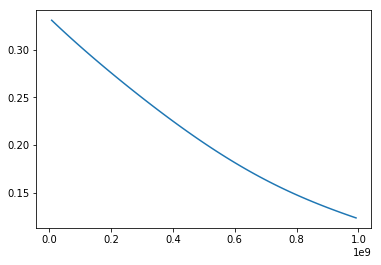

In [7]:
y, linedata = getRawLineData(ds0,'rho')
plt.plot(y,linedata)

#### Subtract off the analytically expected value from different variables

#### rho0 vs expected

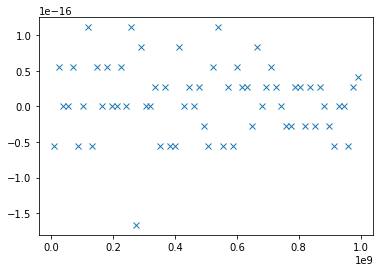

In [8]:
y, rho = getRawLineData(ds0,'rho0')
rhoExpected = np.zeros(len(y))

# in the code, have used "use_p_H_g", which means pres_base, scale height H and g are set, and then rho etc is calc from them
pBase = 1e13
H = 1e9
g = 3e4 # just want magnitude / positive

rhoBase = pBase / g / H

for i, yc in enumerate(y):
    rhoExpected[i] = rhoBase * np.exp(-yc/H);
    #print(i,y, rho[i], rhoExpected[i], rhoExpected[i] - rho[i])
    
plt.plot(y, (rho-rhoExpected), 'x')

~~This does make it look as though there is some issue with the value of rho in the first cell! Origionally, i thought the slightly off lineplots were because yt wanted to try and guess the value at y==0  (i.e. on the face) and extrapolated from the cell. This raw data seems to be exactly the value in the cell.~~ -**Looks a lot better now!!!**

Can check this like so...

In [9]:
y, rho = getRawLineData(ds0,'rho0')
print('the method returned rho={} in the first index'.format(rho[0]))

the method returned rho=0.33073931275341445 in the first index


In [10]:
string = ds0Path + 'BaseCC_0'

In [11]:
%%bash -s "$string"
head -2 $1

r_cc  rho0  rhoh0  p0  gamma1bar 
7812500 0.33073931275341445 24805448456506.07 9922179382602.4355 1.6666666666666681


you can see that it is exactly that

#### p0 expected vs recorded

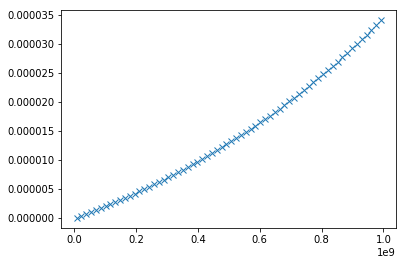

In [12]:
y, p0 = getRawLineData(ds0,'p0')
pExpected = np.zeros(len(y))

# in the code, have used "use_p_H_g", which means pres_base, scale height H and g are set, and then rho etc is calc from them
pBase = 1e13
H = 1e9
g = 3e4 # just want magnitude / positive


for i, yc in enumerate(y):
    pExpected[i] = pBase * np.exp(-yc/H);
    
plt.plot(y, (pExpected-p0)/p0, 'x')

~~So there seems to be a similar issue~~

In [13]:
print(p0[0], pExpected[0])

9922179382602.436 9922179382602.436


The above is a bit more of a clue - the pressure at the first cell seems to be the value it should be on the edge!!!